In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv
from docx import Document

In [6]:
#Чтобы работать с базами данных нужно их сначало создать
csvfile = open('data.csv','w')

writer = csv.writer(csvfile, delimiter=',', quotechar='"',quoting=csv.QUOTE_MINIMAL) #введение параметров записи
writer.writerow(['Имя', 'Возраст', "Профессия", "Доход", "Город проживания"]) #Задание структуры данных
csvfile.close()
#Здесь мы создали новый файл, чтобы начать добавлять в него записи.
#Если такой файл уже был - просто пропускаем этот пункт.

In [7]:
with open('data.csv', 'a') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    print("Начата запись данных")
    while True:
        print('''Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД''')
        data = input()
        if data.lower()=='выход':
            print('Запись закончена, спасибо')
            break
        else:
            data = data.split()
            writer.writerow(data)  

Начата запись данных
Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Макар 20 летчик 120000 Москва
Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Иван 19 физик 50000 -
Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Кирилл 18 аналитик 40000 Санкт-Петербург
Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Денис химик 80000 Москва
Вводите данные через пробел, если данные отсутсвуют - вводите прочерк.
Вводите со

In [11]:
#Теперь когда у нас есть данные, введенные в ручную, можно их преобразовать в таблицу
df = pd.read_csv('data.csv')
df

,Имя,Возраст,Профессия,Доход,Город проживания
0,Макар,20,летчик,120000,Москва
1,Иван,19,физик,50000,-
2,Кирилл,18,аналитик,40000,Санкт-Петербург
3,Денис,24,химик,80000,Москва
4,Николай,-,программист,-,Калуга


In [12]:
#Нужно заменить прочерки на значение NaN, так как именно с этими значениями работает Pandas
title = df.columns #Получаем названия колонок Dataframe
for t in title:
    df.loc[df[t]=='-', t] = float('NaN')

In [13]:
df

,Имя,Возраст,Профессия,Доход,Город проживания
0,Макар,20,летчик,120000,Москва
1,Иван,19,физик,50000,NaN
2,Кирилл,18,аналитик,40000,Санкт-Петербург
3,Денис,24,химик,80000,Москва
4,Николай,NaN,программист,NaN,Калуга


In [52]:
#Допустим, что данные о человеке изменились, значит надо изменить и данные в dataframe
df.loc[df['Имя']=='Денис','Профессия'] = 'химик'

In [91]:
df = pd.read_csv('data.csv')
df2 = pd.read_excel('data.xlsx')
df==df2

,Индекс,Имя,Возраст,Профессия,Доход,Город проживания
0,True,True,True,True,True,True
1,True,True,True,True,True,False
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,False,True,False,True
5,True,True,True,True,True,True
6,True,True,True,True,False,True
7,True,True,True,True,True,True


In [101]:
float('NaN')==float('NaN')

False

In [95]:
try:
    df = pd.read_csv('data.csv')
    df = df.set_index('Индекс')
except FileNotFoundError:
    df = pd.DataFrame(columns=["Имя", "Возраст", "Профессия", "Доход", "Город проживания"])
    df.index.name = 'Индекс'
print("Начата запись данных")
while True:
    print('''Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД''')
    data = input()
    if data.lower()=='выход':
        print('Запись закончена, спасибо')
        break
    else:
        data = data.split()
        if '-' in data:
            for i in range(5):
                if data[i] == '-':
                    data[i] = float('NaN')
        df.loc[df.shape[0],:] = data
df.to_csv('data.csv')
df.to_excel('data.xlsx')

Начата запись данных
Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Макар 20 летчик 120000 Москва
Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Иван 19 физик 50000 -
Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Кирилл 18 аналитик 40000 Санкт-Петербург
Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вводите соответственно порядку: Имя, Возраст, Профессия, Доход, Город проживания.
Для выхода из режима записи введите ВЫХОД
Денис 24 химик 80000 Москва
Вводите данные через пробел, если данные отсутствуют - вводите прочерк.
Вв

In [98]:
df

,Имя,Возраст,Профессия,Доход,Город проживания
Индекс,,,,,
0,Макар,20,летчик,120000,Москва
1,Иван,19,физик,50000,NaN
2,Кирилл,18,аналитик,40000,Санкт-Петербург
3,Денис,24,химик,80000,Москва
4,Николай,NaN,программист,NaN,Калуга
5,Мария,35,художник,160000,NaN


In [ ]:
#Таким образом мы смогли создать программу, которая может заполнять файл данными, введными в ручную
#Но что насчет случайных данных?

In [120]:
data = np.random.randint(100, 300, size=(12,13))#создаем массив из случайных чисел от 100 до 300
months = ['January','Februare', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = np.array([i for i in range (2008, 2021)])
sales = pd.DataFrame(data, columns=years, index=months)
sales

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
January,137,143,220,193,137,276,281,265,275,105,275,273,228
Februare,147,195,207,266,184,217,104,176,147,246,186,179,259
March,144,166,196,263,163,219,246,252,140,261,198,128,184
April,186,272,211,145,234,285,274,221,132,223,268,276,187
May,263,267,205,210,245,280,261,157,147,132,234,170,178
June,274,183,279,131,267,150,119,123,139,270,180,127,298
July,144,237,197,115,179,115,142,136,158,120,259,179,258
August,226,285,122,205,264,246,190,191,129,127,233,164,159
September,148,155,192,115,211,171,118,209,290,106,180,179,290
October,286,297,210,290,116,126,151,271,162,190,197,230,113


<AxesSubplot:>

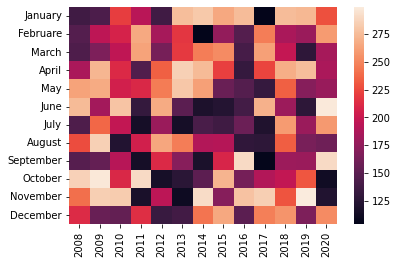

In [121]:
sns.heatmap(sales)

# Для дальнейшей работы воспользуемся готовыми базами данных
## Например, популярные titanic и iris

In [136]:
iris = sns.load_dataset('iris')
print('Названия колонок:', end =' ')
print(*iris.columns)
iris.head()

Названия колонок: sepal_length sepal_width petal_length petal_width species


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [135]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


{'setosa': 50, 'versicolor': 50, 'virginica': 50}


<BarContainer object of 3 artists>

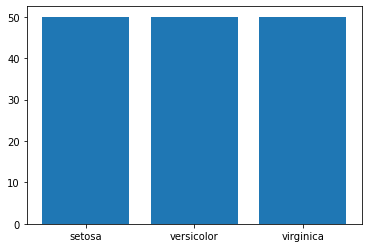

In [123]:
count_species = dict(iris['species'].value_counts())
print(count_species)
plt.bar(count_species.keys(),count_species.values())

In [125]:
mean_iris = iris.groupby('species').mean()
mean_iris

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


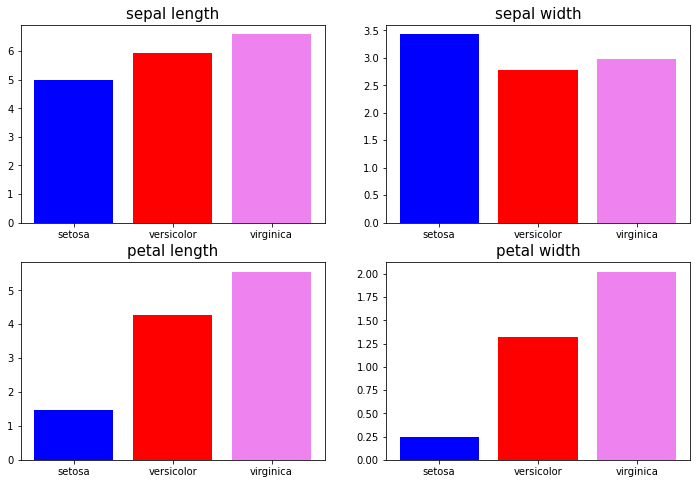

In [169]:
fig, axes = plt.subplots(2,2)

axes[0][0].bar(mean_iris.index, mean_iris['sepal_length'],color=['blue', 'red','violet'])
axes[0][0].set_title('sepal length', fontsize=15)

axes[0][1].bar(mean_iris.index, mean_iris['sepal_width'],color=['blue', 'red','violet'])
axes[0][1].set_title('sepal width', fontsize=15)

axes[1][0].bar(mean_iris.index, mean_iris['petal_length'],color=['blue', 'red','violet'])
axes[1][0].set_title('petal length', fontsize=15)

axes[1][1].bar(mean_iris.index, mean_iris['petal_width'],color=['blue', 'red','violet'])
axes[1][1].set_title('petal width', fontsize=15)

fig.set_figwidth(12) 
fig.set_figheight(8)
fig.savefig('iris_mean')
plt.show()

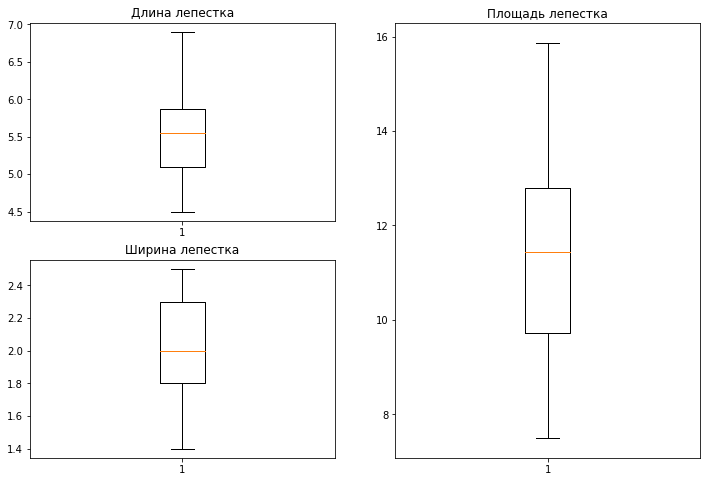

In [188]:

virg_petal = iris.loc[iris['species']=='virginica', ['petal_length','petal_width']]
petal_len = virg_petal['petal_length'].values
petal_wid = virg_petal['petal_width'].values
square_petal = petal_len * petal_wid 

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.boxplot(petal_len)
plt.title('Длина лепестка')

plt.subplot(2,2,3)
plt.boxplot(petal_wid)
plt.title('Ширина лепестка')

plt.subplot(1,2,2)
plt.boxplot(square_petal)
plt.title('Площадь лепестка')

plt.savefig('virginica petal')
plt.show()

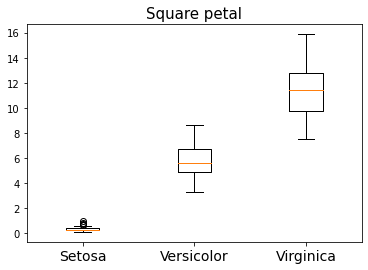

In [194]:
setosa_petal = iris.loc[iris['species']=='setosa', ['petal_length','petal_width']]
setosa_len = setosa_petal['petal_length'].values
setosa_wid = setosa_petal['petal_width'].values
ps_setosa = setosa_len * setosa_wid

ver_petal = iris.loc[iris['species']=='versicolor', ['petal_length','petal_width']]
ver_len = ver_petal['petal_length'].values
ver_wid = ver_petal['petal_width'].values
ps_ver = ver_len * ver_wid

virg_petal = iris.loc[iris['species']=='virginica', ['petal_length','petal_width']]
virg_len = virg_petal['petal_length'].values
virg_wid = virg_petal['petal_width'].values
ps_virg = virg_len * virg_wid

plt.boxplot([ps_setosa, ps_ver, ps_virg],labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.xticks(fontsize=14)
plt.title('Square petal', fontsize = 15)
plt.savefig('Square petal')
plt.show()

In [103]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [104]:
#Допустим, мы хотим знать сколько людей выжило, тогда
survived = titanic['survived'].sum()
print("Всего человек выжило:",survived)

Всего человек выжило: 342


In [195]:
#Но я бы уточнил данные, и посчитал сколько выжило мужчин, женщин и детей (то есть по отдельности по колонке 'who')
who_survived = titanic.loc[:,['survived', 'who']]
who_survived_sum = who_survived.groupby('who').sum()
who_survived_sum

,survived
who,
child,49
man,88
woman,205


In [196]:
count = who_survived_sum.values
count_surv = [i[0] for i in count]
count_surv

[49, 88, 205]

In [ ]:
#сделать две диаграммы, на одной сколько всего по каждому было, другую выжило, В ОДИНАКОВОМ МАСШТАБЕ

In [197]:
who_did = titanic['who'].value_counts()
who_did = dict(who_did)
who_did

{'man': 537, 'woman': 271, 'child': 83}

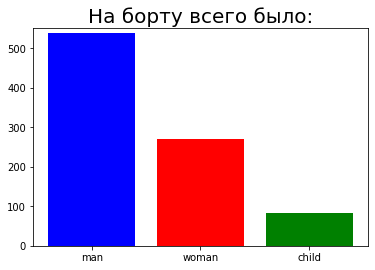

In [203]:
#для начала нужно сделать общую диаграмму, где показывается сколько людей каждой категории было на борту
plt.bar(who_did.keys(),who_did.values(),color=['blue', 'red', 'green'])
plt.title(label='На борту всего было:', fontsize=20)
plt.ylim(bottom=0, top = 550)
plt.savefig('На борту всего было')
plt.show()

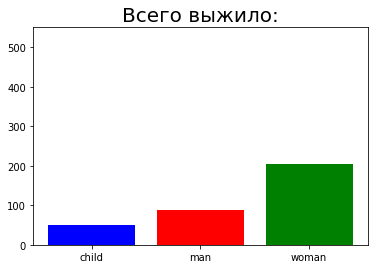

In [199]:
label = who_survived_sum.index
plt.bar(label, count_surv, color=['blue', 'red', 'green'])
plt.title(label='Всего выжило:', fontsize=20)
plt.ylim(bottom=0, top = 550)
plt.show()
#цвета распределены неправильно

In [200]:
count_surv_like = [count_surv[1], count_surv[2], count_surv[0]]

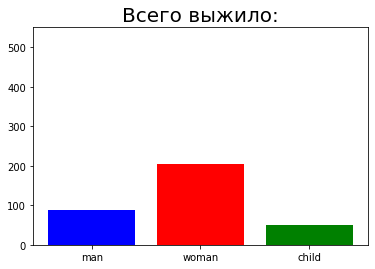

In [202]:
label = who_survived_sum.index
plt.bar(['man', 'woman', 'child'], count_surv_like, color=['blue', 'red', 'green'])
plt.title(label='Всего выжило:', fontsize=20)
plt.ylim(bottom=0, top = 550)
plt.savefig('Всего выжило')
plt.show()

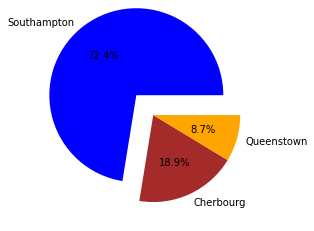

In [232]:
em_town = titanic['embark_town'].value_counts()
plt.pie(em_town.values,
        explode=[0.3,0,0],
        labels=em_town.index,
        colors=['blue','brown', 'orange'],
        autopct='%0.1f%%')
plt.savefig('Процент – порты')
plt.show()

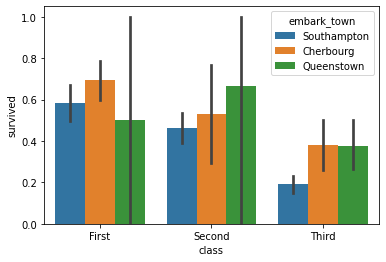

In [235]:
sns.barplot(x="class", y="survived", hue="embark_town", data=titanic)
plt.savefig('Количество выживших пассажиров в зависимости от класса')
plt.show()

In [259]:
from docx import Document, shared

In [267]:
document = Document()

file_name_iris = ['iris_mean',
             'virginica petal',
             'Square petal']
for file in file_name_iris:
    document.add_picture(file+'.png', width=shared.Cm(16))
document.save("Результаты iris.docx")

In [268]:
document = Document()

file_name_tit = ['На борту всего было',
             'Всего выжило',
             'Процент – порты',
             'Количество выживших пассажиров в зависимости от класса']
for file in file_name_tit:
    document.add_picture(file+'.png', width=shared.Cm(16))
document.save("Результаты titanic.docx")

In [ ]:
x = int(input())
runif = np.random.randint(1,7,x)
counts = runif.value_counts()
counts